# Data preparation

In [2]:
import pandas as pd

In [3]:
# load data csv file
path = 'a1_data (1).csv'
df = pd.read_csv(path)

In [4]:
df.columns = ['Age of patient', 'Patient’s year', 'Number of positive ', 'Survival status']
df.head()

,Age of patient,Patient’s year,Number of positive,Survival status
0,30.0,62.0,3.0,1
1,30.0,65.0,0.0,1
2,31.0,59.0,2.0,1
3,31.0,65.0,4.0,1
4,33.0,58.0,10.0,1


In [5]:
df.columns = df.columns.str.replace(' ', '_')
df

,Age_of_patient,Patient’s_year,Number_of_positive_,Survival_status
0,30.0,62.0,3.0,1
1,30.0,65.0,0.0,1
2,31.0,59.0,2.0,1
3,31.0,65.0,4.0,1
4,33.0,58.0,10.0,1
...,...,...,...,...
300,75.0,62.0,1.0,1
301,76.0,67.0,0.0,1
302,77.0,65.0,3.0,1
303,78.0,65.0,1.0,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age_of_patient       303 non-null    float64
 1   Patient’s_year       304 non-null    float64
 2   Number_of_positive_  303 non-null    float64
 3   Survival_status      305 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 9.7 KB


In [8]:
df.dtypes

Age_of_patient         float64
Patient’s_year         float64
Number_of_positive_    float64
Survival_status          int64
dtype: object

In [11]:
from pandas.plotting import scatter_matrix


array([[<AxesSubplot:title={'center':'Survival_status'}>]], dtype=object)

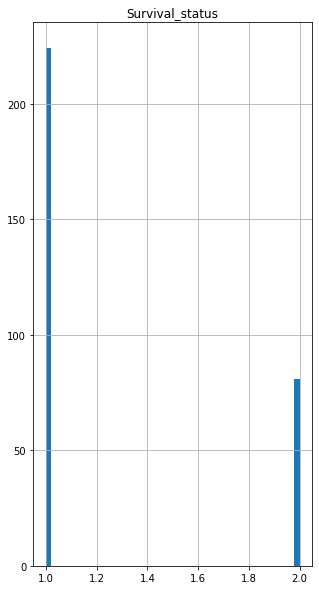

In [17]:
# plot histogram for Survival_status
df.hist("Survival_status", bins=50, figsize=(5,10)) 

In [9]:
df.describe()

,Age_of_patient,Patient’s_year,Number_of_positive_,Survival_status
count,303.000000,304.000000,303.000000,305.000000
mean,52.633663,62.838816,4.056106,1.265574
std,10.703459,3.254396,7.218456,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,65.250000,4.500000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [23]:
df.isnull().sum()

Age_of_patient         2
Patient’s_year         1
Number_of_positive_    2
Survival_status        0
dtype: int64

In [24]:
df['Age_of_patient'] = df['Age_of_patient'].fillna(df['Age_of_patient'].mean())

df['Patient’s_year'] = df['Patient’s_year'].fillna(df['Patient’s_year'].mean())

df['Number_of_positive_'] = df['Number_of_positive_'].fillna(df['Number_of_positive_'].mean())

In [25]:
df.isnull().sum()

Age_of_patient         0
Patient’s_year         0
Number_of_positive_    0
Survival_status        0
dtype: int64

# Split the data into train and test set

In [29]:
from sklearn.model_selection import train_test_split 
# Separate feature columns and target column
# We have freedom to chose features on which we want to train our model
X = df[['Age_of_patient','Patient’s_year','Number_of_positive_']]# feature columns
y = df['Survival_status'] # target column 

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Trainning Models

In [2]:
# First model is Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() 
model.fit(X_train,y_train) # Fit the model

NameError: name 'X_train' is not defined

In [36]:
# prediction
predictions = model.predict(X_test)
predictions


array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1])

In [37]:
len(predictions)

92

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
# Model Evaluation for Logistic Regression
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

0.75
              precision    recall  f1-score   support

           1       0.77      0.94      0.85        68
           2       0.56      0.21      0.30        24

    accuracy                           0.75        92
   macro avg       0.66      0.57      0.58        92
weighted avg       0.71      0.75      0.71        92

[[64  4]
 [19  5]]


In [44]:
# Second model is Decision Tree
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
# Prediction
predictions = DT.predict(X_test)
predictions

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1,
       1, 2, 2, 1])

In [49]:
len(predictions)

92

In [51]:
# Model Evaluation Decision Tree
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

0.6847826086956522
              precision    recall  f1-score   support

           1       0.79      0.78      0.79        68
           2       0.40      0.42      0.41        24

    accuracy                           0.68        92
   macro avg       0.60      0.60      0.60        92
weighted avg       0.69      0.68      0.69        92

[[53 15]
 [14 10]]


In [52]:
# Final model is SVM
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_train)

SVC()

In [54]:
predictions = svm.predict(X_test)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1])

In [55]:
len(predictions)

92

In [56]:
# Model Evaluation for SVM
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

0.7391304347826086
              precision    recall  f1-score   support

           1       0.74      0.99      0.85        68
           2       0.50      0.04      0.08        24

    accuracy                           0.74        92
   macro avg       0.62      0.51      0.46        92
weighted avg       0.68      0.74      0.65        92

[[67  1]
 [23  1]]
